In [63]:
! python -V

Python 3.12.4


In [64]:
import math
import time
import random
import numpy as np
import json
from concurrent.futures import ProcessPoolExecutor
import multiprocessing as mp
from bessel_zeros import get_bessel_zeros
from scipy.special import jv, jvp, gamma, loggamma
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
font = font_manager.FontProperties(style='normal', size=20)
import matplotlib.ticker as ticker
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

from bessel_zeros import get_bessel_zeros
from CDFs3_working import build_cdfs as build_cdfs
import seaborn as sns

In [65]:
# open a json file to save path lengths
d = 15
with open(f"path_length_{d}.json", 'r') as json_file:
        # Use json.load() to convert the file content into a Python dictionary
        length_dict = json.load(json_file)
with open(f"p_exit_{d}.json", 'r') as json_file:
        # Use json.load() to convert the file content into a Python dictionary
        p_dict = json.load(json_file)    
        # p_surv = [v for k, v in p_dict.items()]

In [66]:
avg_length = np.array([[p_dict[s], np.mean(length)-1] for s, length in length_dict.items()])
avg_length = avg_length.astype(float)
np.round(avg_length,3,out=None)

array([[0.0000e+00, 1.0000e+00],
       [0.0000e+00, 1.0000e+00],
       [0.0000e+00, 1.0000e+00],
       [0.0000e+00, 1.0000e+00],
       [1.0000e-03, 1.0010e+00],
       [7.0000e-03, 1.0070e+00],
       [2.8000e-02, 1.0280e+00],
       [7.5000e-02, 1.0810e+00],
       [1.4900e-01, 1.1770e+00],
       [2.4200e-01, 1.3220e+00],
       [3.4600e-01, 1.5250e+00],
       [4.5000e-01, 1.8110e+00],
       [5.4700e-01, 2.2040e+00],
       [6.3300e-01, 2.7310e+00],
       [7.0700e-01, 3.4160e+00],
       [7.6900e-01, 4.2930e+00],
       [8.1900e-01, 5.4230e+00],
       [8.5900e-01, 6.7530e+00],
       [8.9100e-01, 8.4010e+00],
       [9.1600e-01, 1.0228e+01],
       [9.3500e-01, 1.2094e+01],
       [9.5100e-01, 1.4234e+01],
       [9.6200e-01, 1.6336e+01],
       [9.7100e-01, 1.8558e+01],
       [9.7800e-01, 2.0690e+01],
       [9.8300e-01, 2.2850e+01],
       [9.8700e-01, 2.5077e+01],
       [9.9000e-01, 2.7098e+01],
       [9.9300e-01, 2.9258e+01],
       [9.9400e-01, 3.1262e+01],
       [9.

/var/folders/x2/jwwtmhbn3kzfqtgxfhgs14zm0000gp/T/ipykernel_62922/2211467691.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.arange(0.,1.,0.01), (1/(np.array(np.arange(0.,1.,0.01)))), marker='*', linewidth=2, color='red', label=r'Theoretical: $\frac{1}{1-H_s}$')


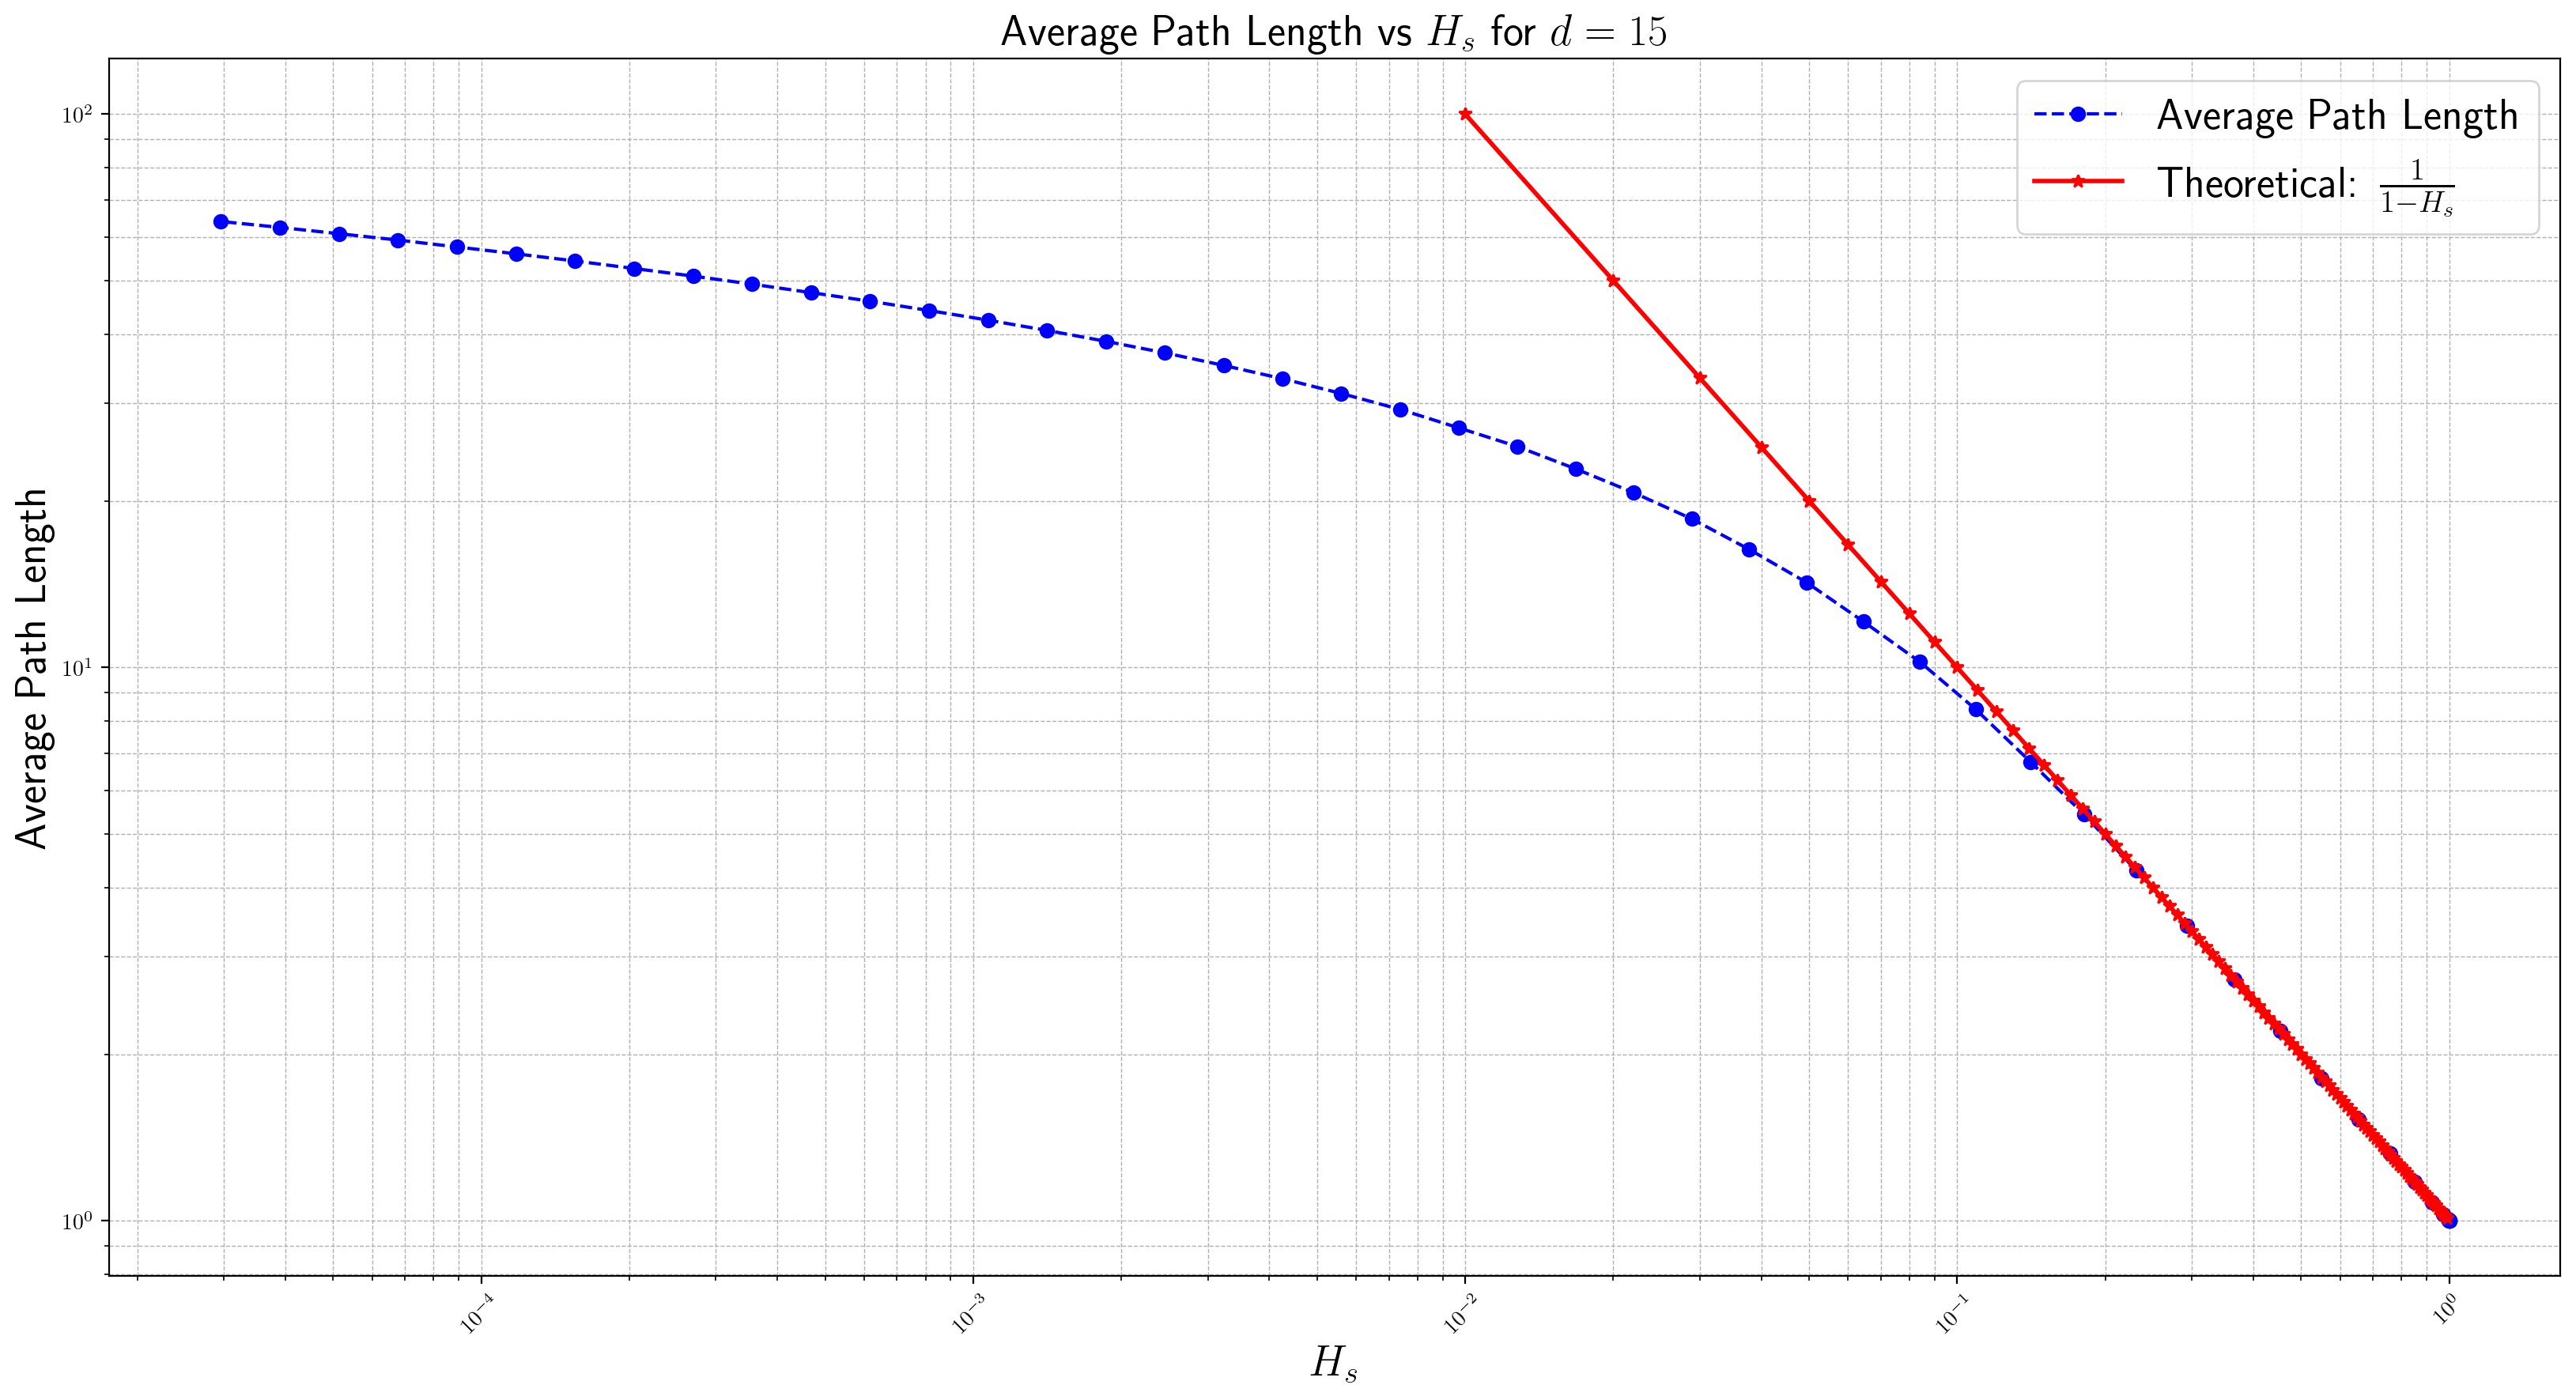

In [76]:
# ── PLOTTING ────────────────────────────────────────────────────────────────
f , ax = plt.subplots(figsize=(20, 10),dpi=200)
ax.plot(1-avg_length[:,0], avg_length[:,1], marker='o', linestyle='--', color='blue', label='Average Path Length')
plt.plot(np.arange(0.,1.,0.01), (1/(np.array(np.arange(0.,1.,0.01)))), marker='*', linewidth=2, color='red', label=r'Theoretical: $\frac{1}{1-H_s}$')
plt.xlabel(r'$H_s$', fontproperties=font)
plt.ylabel('Average Path Length', fontproperties=font)
plt.title(r'Average Path Length vs $H_s$ for $d={}$'.format(d), fontproperties=font)
ax.set_xticks(avg_length[:,0])
plt.xticks(rotation=45);
plt.yscale('log');
plt.xscale('log');
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(prop=font)
plt.show()
f.savefig(f'avg_path_length_{d}.pdf',format="pdf",dpi=600)

In [69]:
#finding the slopes
(avg_length[1:,1] - avg_length[:-1,1]) / (avg_length[1:,0] - avg_length[:-1,0])

array([-0.00000000e+00,  0.00000000e+00,  9.59479710e-01,  1.00329190e+00,
        1.03773925e+00,  9.77422606e-01,  1.12042700e+00,  1.31558161e+00,
        1.54383033e+00,  1.95975567e+00,  2.75065884e+00,  4.04544562e+00,
        6.11072746e+00,  9.25709745e+00,  1.42722263e+01,  2.25371369e+01,
        3.30737926e+01,  5.17257501e+01,  7.30592277e+01,  9.57591240e+01,
        1.41800090e+02,  1.80523500e+02,  2.48322416e+02,  3.10809947e+02,
        4.11741563e+02,  5.56063567e+02,  6.61711415e+02,  9.28389273e+02,
        1.13179057e+03,  1.46948143e+03,  1.84945228e+03,  2.42594696e+03,
        3.06810099e+03,  4.03091889e+03,  5.21030173e+03,  6.70389899e+03,
        8.87914669e+03,  1.12069920e+04,  1.50831805e+04,  1.96511266e+04,
        2.51282332e+04,  3.39397089e+04,  4.37404306e+04,  5.69054283e+04,
        7.77489740e+04,  9.70581932e+04,  1.29830656e+05,  1.66255018e+05])